# Data Preprocessing

Import Libraries

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Call The Dataset

In [289]:
priceHouse = pd.read_csv('data.csv')
priceHouse.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [290]:
priceHouse.shape

(4600, 18)

Drop & Convert Columns

In [291]:
priceHouse = priceHouse.drop(['date' , 'view' , 'sqft_above' , 'sqft_basement' , 'street' , 'statezip'], axis=1)
priceHouse['bathrooms'] = priceHouse['bathrooms'].astype(int)
priceHouse['floors'] = priceHouse['floors'].astype(int)
priceHouse['price'] = priceHouse['price'].astype(float)

priceHouse.head(5)
# priceHouse.columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1,1340,7912,1,0,3,1955,2005,Shoreline,USA
1,2384000.0,5.0,2,3650,9050,2,0,5,1921,0,Seattle,USA
2,342000.0,3.0,2,1930,11947,1,0,4,1966,0,Kent,USA
3,420000.0,3.0,2,2000,8030,1,0,4,1963,0,Bellevue,USA
4,550000.0,4.0,2,1940,10500,1,0,4,1976,1992,Redmond,USA


Info About Dataset

In [292]:
priceHouse.shape

(4600, 12)

In [293]:
priceHouse.info

<bound method DataFrame.info of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0          1         1340      7912       1   
1     2.384000e+06       5.0          2         3650      9050       2   
2     3.420000e+05       3.0          2         1930     11947       1   
3     4.200000e+05       3.0          2         2000      8030       1   
4     5.500000e+05       4.0          2         1940     10500       1   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0          1         1510      6360       1   
4596  5.343333e+05       3.0          2         1460      7573       2   
4597  4.169042e+05       3.0          2         3010      7014       2   
4598  2.034000e+05       4.0          2         2090      6630       1   
4599  2.206000e+05       3.0          2         1490      8102       2   

      waterfront  condition  yr_built  yr_renovated       city country  
0     

In [294]:
print(priceHouse.isnull().sum())

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
yr_built        0
yr_renovated    0
city            0
country         0
dtype: int64


In [295]:
priceHouse.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,3.451739,1970.786304,808.608261
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.677230,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,3.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,5.000000,2014.000000,2014.000000


C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

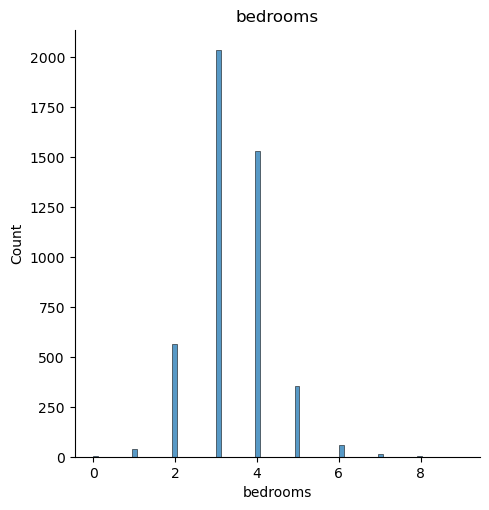

In [296]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['bedrooms'])
plt.title('bedrooms')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

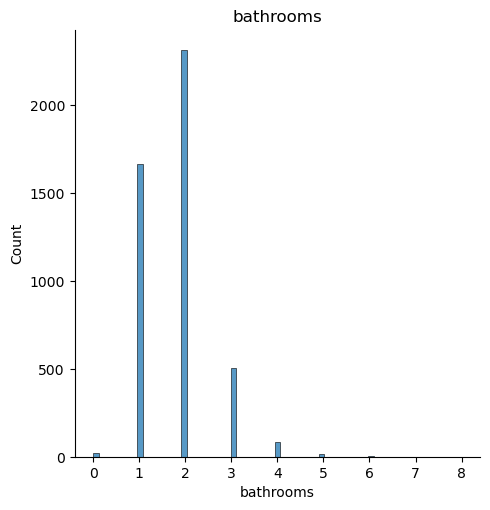

In [297]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['bathrooms'])
plt.title('bathrooms')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

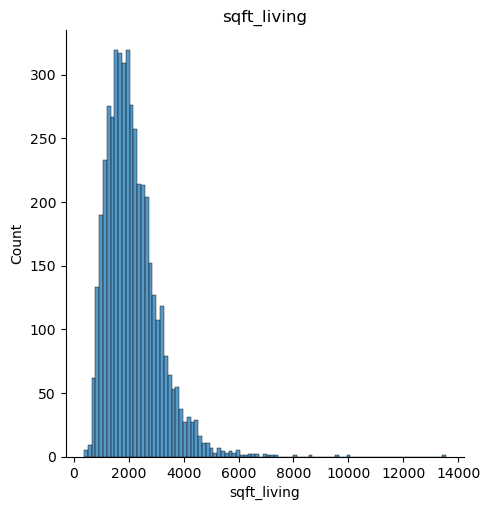

In [298]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['sqft_living'])
plt.title('sqft_living')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

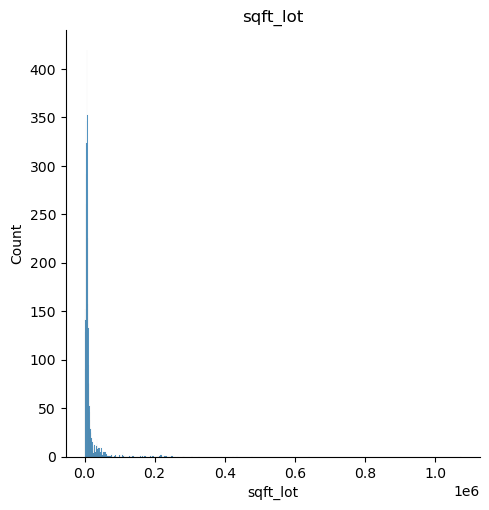

In [299]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['sqft_lot'])
plt.title('sqft_lot')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

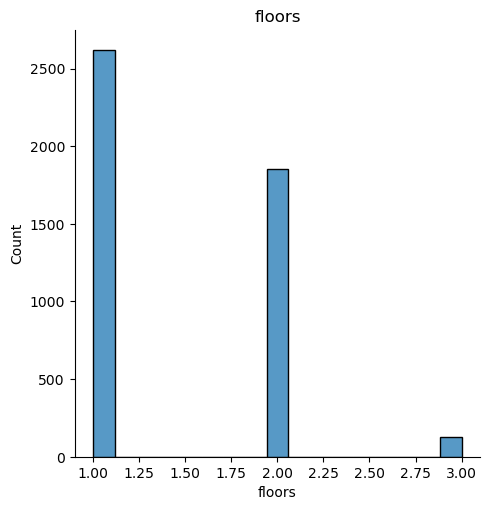

In [300]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['floors'])
plt.title('floors')
plt.show()

In [301]:
priceHouse['waterfront'].value_counts()

waterfront
0    4567
1      33
Name: count, dtype: int64

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

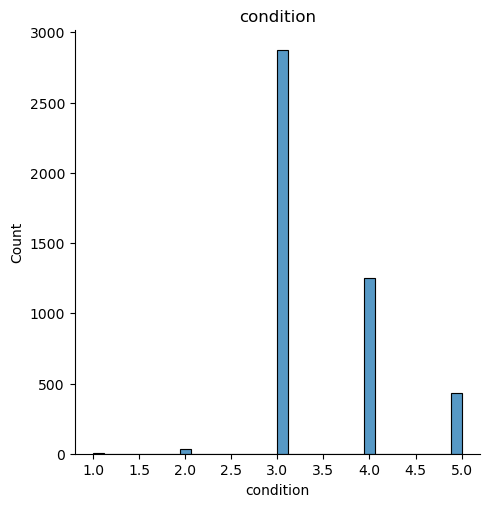

In [302]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['condition'])
plt.title('condition')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

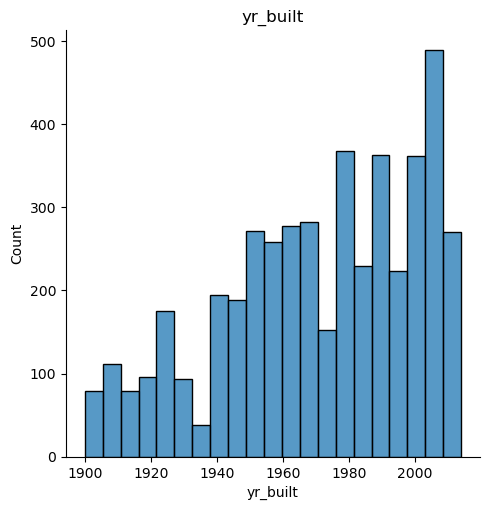

In [303]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['yr_built'])
plt.title('yr_built')
plt.show()

C:\Users\MR.GN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

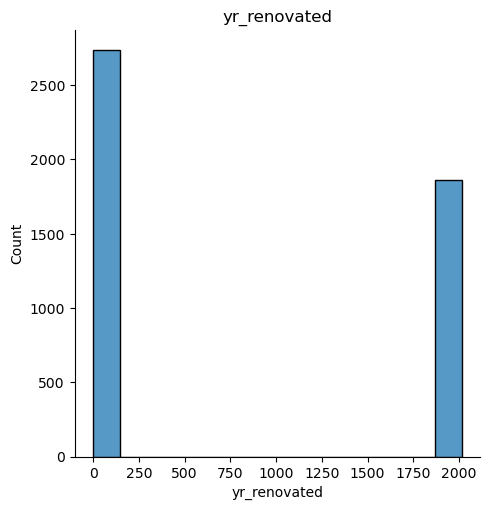

In [304]:
plt.figure(figsize=(6,6))
sns.displot(priceHouse['yr_renovated'])
plt.title('yr_renovated')
plt.show()

In [305]:
priceHouse['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [306]:
priceHouse['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

Splitting The dataset into Features & Dependent

In [307]:
X = priceHouse.drop(columns='price' , axis=1).values
y = priceHouse['price'].values
print(X)
print(y)

[[3.0 1 1340 ... 2005 'Shoreline' 'USA']
 [5.0 2 3650 ... 0 'Seattle' 'USA']
 [3.0 2 1930 ... 0 'Kent' 'USA']
 ...
 [3.0 2 3010 ... 0 'Renton' 'USA']
 [4.0 2 2090 ... 0 'Seattle' 'USA']
 [3.0 2 1490 ... 0 'Covington' 'USA']]
[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


Dealing With Missing Data

In [308]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputer.fit(X[: , 0:9])
X[: , 0:9] = imputer.transform(X[: , 0:9])
print(X.shape)


(4600, 11)


In [309]:
priceHouse.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1,1340,7912,1,0,3,1955,2005,Shoreline,USA
1,2384000.0,5.0,2,3650,9050,2,0,5,1921,0,Seattle,USA
2,342000.0,3.0,2,1930,11947,1,0,4,1966,0,Kent,USA
3,420000.0,3.0,2,2000,8030,1,0,4,1963,0,Bellevue,USA
4,550000.0,4.0,2,1940,10500,1,0,4,1976,1992,Redmond,USA


Encoding

In [310]:
label_encoder = LabelEncoder()
priceHouse['city'] = label_encoder.fit_transform(priceHouse['city'])
priceHouse['country'] = label_encoder.fit_transform(priceHouse['country'])

priceHouse.head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1,1340,7912,1,0,3,1955,2005,36,0
1,2384000.0,5.0,2,3650,9050,2,0,5,1921,0,35,0
2,342000.0,3.0,2,1930,11947,1,0,4,1966,0,18,0
3,420000.0,3.0,2,2000,8030,1,0,4,1963,0,3,0
4,550000.0,4.0,2,1940,10500,1,0,4,1976,1992,31,0
5,490000.0,2.0,1,880,6380,1,0,3,1938,1994,35,0
6,335000.0,2.0,2,1350,2560,1,0,3,1976,0,31,0
7,482000.0,4.0,2,2710,35868,2,0,3,1989,0,21,0
8,452500.0,3.0,2,2430,88426,1,0,4,1985,0,27,0
9,640000.0,4.0,2,1520,6200,1,0,3,1945,2010,35,0


# Correlation

<Axes: >

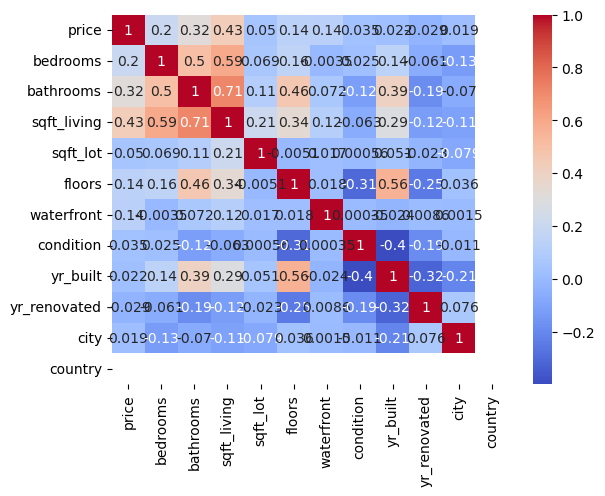

In [311]:
correlation_matrix = priceHouse.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')

In [312]:
X = priceHouse.drop(columns='price' , axis=1).values
y = priceHouse['price'].values
print(X)
print(y)

[[3.000e+00 1.000e+00 1.340e+03 ... 2.005e+03 3.600e+01 0.000e+00]
 [5.000e+00 2.000e+00 3.650e+03 ... 0.000e+00 3.500e+01 0.000e+00]
 [3.000e+00 2.000e+00 1.930e+03 ... 0.000e+00 1.800e+01 0.000e+00]
 ...
 [3.000e+00 2.000e+00 3.010e+03 ... 0.000e+00 3.200e+01 0.000e+00]
 [4.000e+00 2.000e+00 2.090e+03 ... 0.000e+00 3.500e+01 0.000e+00]
 [3.000e+00 2.000e+00 1.490e+03 ... 0.000e+00 9.000e+00 0.000e+00]]
[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


Splitting The Dataset into X_train, X_test, y_train, y_test

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(3680, 11)
(920, 11)
(4600, 11)


Feature Scaling

In [314]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[ 0.67051991  0.28398462  0.66097147 ... -0.82244584  1.36120159
   0.        ]
 [ 0.67051991  1.62209399  1.65201056 ... -0.82244584 -0.56874636
   0.        ]
 [ 0.67051991  0.28398462  0.70269944 ... -0.82244584  0.60600457
   0.        ]
 ...
 [-0.43006585 -1.05412474 -1.02901096 ...  1.17817606  0.85773691
   0.        ]
 [-1.5306516  -1.05412474 -1.27937873 ...  1.22619916  0.77382613
   0.        ]
 [-1.5306516  -1.05412474 -0.67432329 ... -0.82244584  0.77382613
   0.        ]]
[[-0.48591438  0.26789276 -0.70462663 ... -0.83876475  0.79672744
   0.        ]
 [ 1.71625916  0.26789276 -0.15408686 ... -0.83876475  0.71492973
   0.        ]
 [-0.48591438  1.5650577   0.80426014 ...  1.19869268  0.79672744
   0.        ]
 ...
 [-0.48591438  0.26789276 -0.9900917  ... -0.83876475 -0.59383356
   0.        ]
 [ 0.61517239  0.26789276  0.22313483 ... -0.83876475 -0.51203586
   0.        ]
 [ 0.61517239  0.26789276  0.11098784 ... -0.83876475 -0.59383356
   0.        ]]


# Linear Regression

In [315]:
reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred_train_reg = reg.predict(X_train)
train_score = reg.score(X_train , y_train)
print("train_score : " , train_score)

reg.fit(X_test , y_test)
y_pred_test_reg = reg.predict(X_test)
test_score = reg.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.5394089719618922
test_score :  0.04501632352462115


In [316]:
print(y_pred_test_reg[:3])
print(y_test[:3])

[455457.20455661 567247.42330046 841301.67969874]
[ 544000.       0. 1712500.]


In [317]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(4600, 11)
(3680, 11)
(920, 11)


In [318]:
score_r2 = metrics.r2_score(y_test , y_pred_test_reg)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.04501632352462115


Text(0, 0.5, 'Predicted Price')

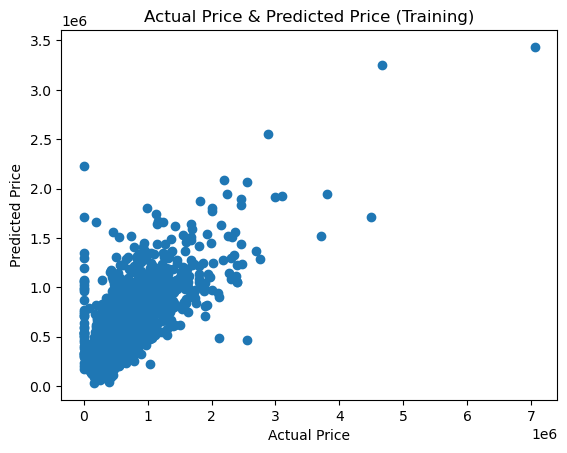

In [319]:
plt.scatter(y_train , y_pred_train_reg)
plt.title("Actual Price & Predicted Price (Training)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

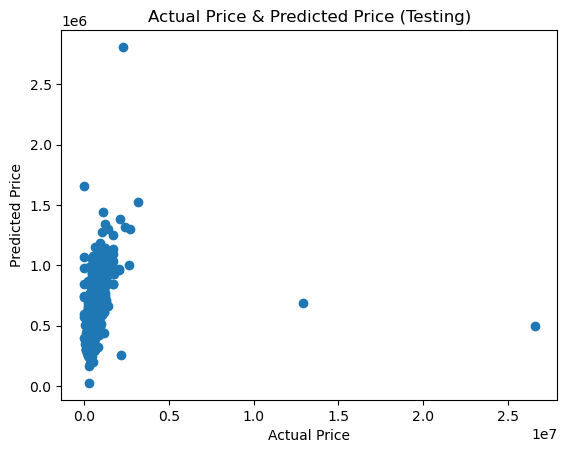

In [320]:
plt.scatter(y_test , y_pred_test_reg)
plt.title("Actual Price & Predicted Price (Testing)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [321]:
input_data = (5 , 2 , 3650 , 9050 , 2 , 0 , 5 , 1921 , 0 , 35 , 0)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = reg.predict(input_data_reshape)
print('the price is ' , prediction[0])

the price is  228440157.22853366


# Ridge

In [322]:
R_module = Ridge(alpha=0.1 , random_state=33)
R_module.fit(X_train , y_train)
y_pred_train_R_module = R_module.predict(X_train)
train_score = R_module.score(X_train , y_train)
print("train_score : " , train_score)

R_module.fit(X_test , y_test)
y_pred_test_R_module = R_module.predict(X_test)
test_score = R_module.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.5394089707135716
test_score :  0.04501632246044707


In [323]:
print(y_pred_test_R_module[:3])
print(y_test[:3])

[455477.42081983 567283.39045968 841276.65983496]
[ 544000.       0. 1712500.]


In [276]:
score_r2 = metrics.r2_score(y_test , y_pred_test_R_module)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.04501632246044707


Text(0, 0.5, 'Predicted Price')

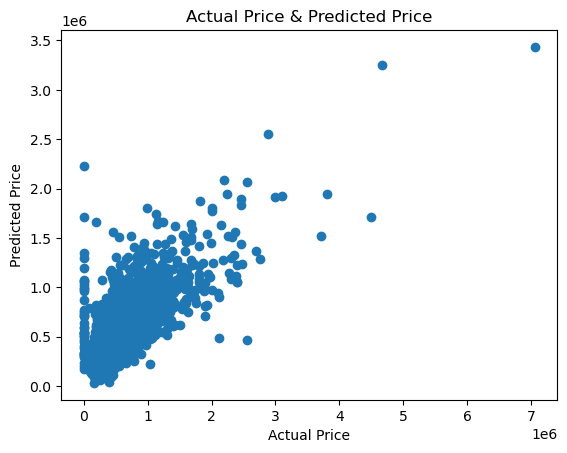

In [277]:
plt.scatter(y_train , y_pred_train_R_module)
plt.title("Actual Price & Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

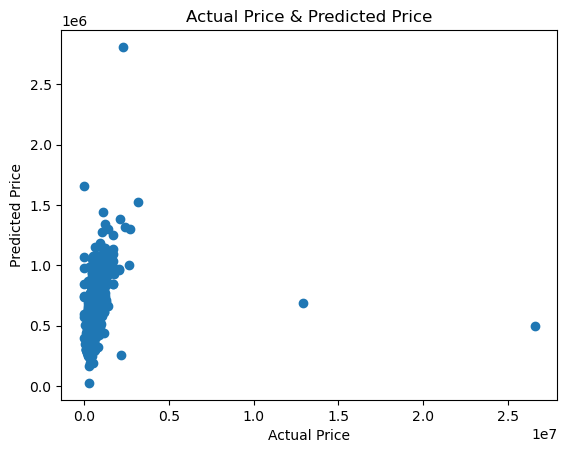

In [278]:
plt.scatter(y_test , y_pred_test_R_module)
plt.title("Actual Price & Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [279]:
priceHouse.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1,1340,7912,1,0,3,1955,2005,36,0
1,2384000.0,5.0,2,3650,9050,2,0,5,1921,0,35,0
2,342000.0,3.0,2,1930,11947,1,0,4,1966,0,18,0
3,420000.0,3.0,2,2000,8030,1,0,4,1963,0,3,0
4,550000.0,4.0,2,1940,10500,1,0,4,1976,1992,31,0


In [280]:
input_data = (5 , 2 , 3650 , 9050 , 2 , 0 , 5 , 1921 , 0 , 35 , 0)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = R_module.predict(input_data_reshape)
print('the price is ' , prediction[0])

the price is  228444563.11947885


# KNeighborsRegressor

In [281]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 6)

knn_scaled = knn.fit(X_train , y_train)
y_pred_train_knn = knn_scaled.predict(X_train)
train_score = knn_scaled.score(X_train , y_train)
print("train_score : " , train_score)

knn_scaled.fit(X_test , y_test)
y_pred_test_knn = knn_scaled.predict(X_test)
test_score = knn_scaled.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.6101100436638995
test_score :  0.22814517778850285


In [282]:
print(y_pred_test_knn[:3])
print(y_test[:3])

[522083.33333333 358350.         952916.66666667]
[ 544000.       0. 1712500.]


In [283]:
score_r2 = metrics.r2_score(y_test , y_pred_test_knn)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.22814517778850285


Text(0, 0.5, 'Predicted Price')

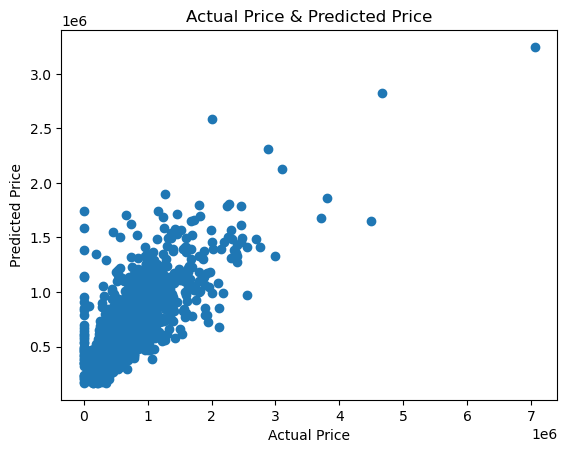

In [284]:
plt.scatter(y_train , y_pred_train_knn)
plt.title("Actual Price & Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

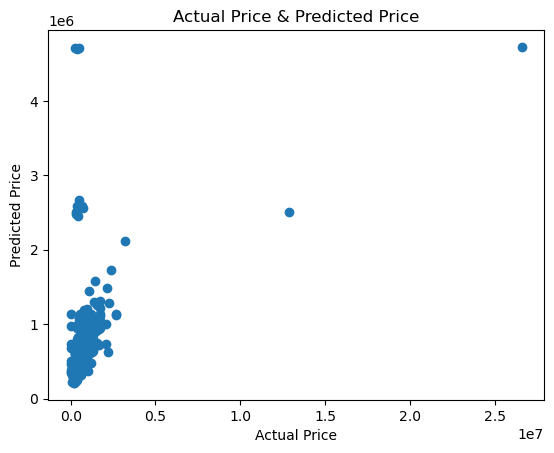

In [285]:
plt.scatter(y_test , y_pred_test_knn)
plt.title("Actual Price & Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

In [286]:
priceHouse.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,313000.0,3.0,1,1340,7912,1,0,3,1955,2005,36,0
1,2384000.0,5.0,2,3650,9050,2,0,5,1921,0,35,0
2,342000.0,3.0,2,1930,11947,1,0,4,1966,0,18,0
3,420000.0,3.0,2,2000,8030,1,0,4,1963,0,3,0
4,550000.0,4.0,2,1940,10500,1,0,4,1976,1992,31,0


In [287]:
input_data = (5 , 2 , 3650 , 9050 , 2 , 0 , 5 , 1921 , 0 , 35 , 0)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = knn_scaled.predict(input_data_reshape)
print('the price is ' , prediction[0])

the price is  962875.0


# Histogram

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'country'}>]], dtype=object)

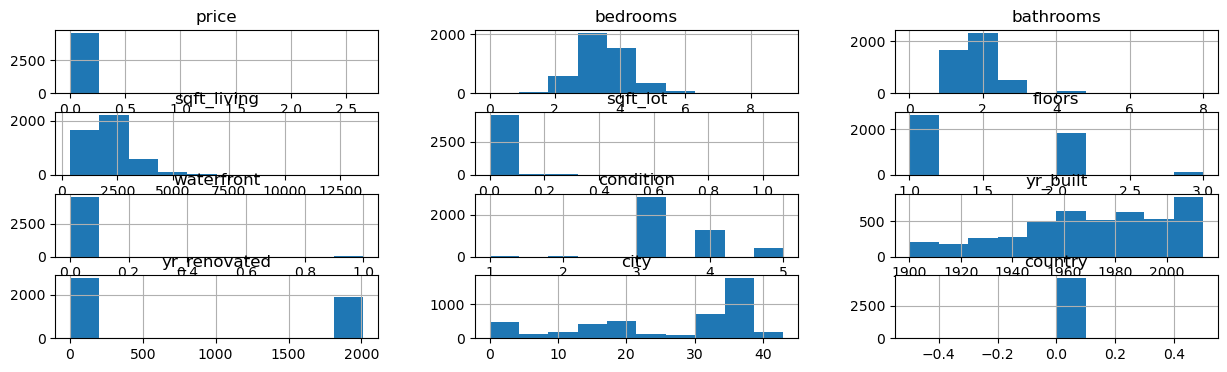

In [238]:
priceHouse.hist(figsize=(15,4))

# Lasso

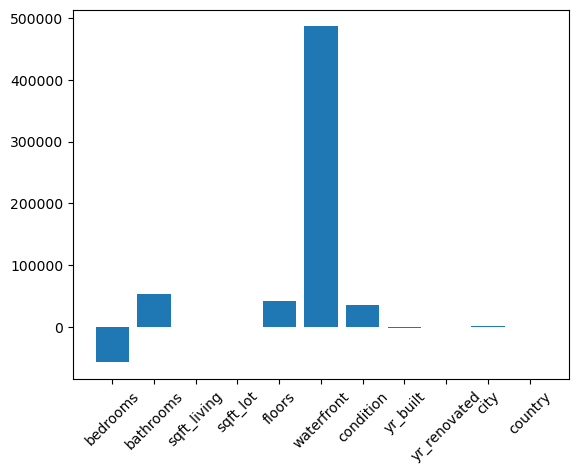

In [239]:
names = priceHouse.drop("price", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()